## Import Libraries and Warnings

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

### Read the First Dataset

In [3]:
#READ THE APPLICATION_DATA dataset
data = pd.read_csv('application_data.csv')

### Read the Second Dataset

In [4]:
#read the previous_application dataset
prev_data = pd.read_csv("previous_application.csv")

In [5]:
#display the first 5 rows and columns of 1st dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#display the first 5 rows and columns of 2nd dataset
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### The total number of rows and columns

In [7]:
#The total number of rows and columns of 1 st dataset
data.shape

(307511, 122)

In [8]:
#The total number of rows and columns of 2nd dataset
prev_data.shape

(1670214, 37)

In [9]:
# returning a dataframe containing categories having missing values and % of missing values in those categories

def missingdata_percentage(df):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [10]:
# Returning a dataframe containing unique values of a category and % of defaulters

def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)


In [11]:
# Dataset description of 2nd dataset
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [12]:
# Dataset description of 1st dataset
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Info of dataset with full summary of columns

In [13]:
#Info of 1st dataset
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [14]:
#Info of 2nd dataset
prev_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Comment:


##### The previous application dataset contains 37 columns and 1672014 rows
##### The application data datset contains 122 columns and 307511 rows

## 2.Data Cleaning

### Handling Missing and Null Values
### Checking the imbalances
### Handling the outliers

To get the maximum performance from the data analysis, we have to handle the missing and null values.

#### Checking the null values from the dataset

In [15]:
#displaying the null values of all the columns
pd.set_option('display.max_rows', None)
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [16]:
# percentage of null values of all columns
n_count = round(100*(data.isnull().sum()/len(data.index)),2)
n_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### Finding columns which have more than 40% null values

In [17]:
# finding out the columns which have 40% null values
n_count = n_count[n_count>=40]
n_count

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [18]:
# The number of columns having more than 40% of null values
print('The number of columns having more than 40% of null values: ', len(n_count))

The number of columns having more than 40% of null values:  49


#### Eliminating null columns

In [19]:
# Since the columns have more null values, we cannot analyse properly if we include those columns in our analysis
#Hence Dropping the 49 columns
columns_dropped = (n_count[n_count>=40].index)
columns_dropped = list(columns_dropped)
data.drop(labels=columns_dropped,axis=1,inplace=True)

#### Check the shape of the updated dataset

In [20]:
# Check the number of rows and columns after eliminating the columns that has more than 40% of null values
data.shape
#The datset has only 73 columns now

(307511, 73)

#### Percentage of null values in updated datset

In [21]:
#Percentage of null values in updated datset
100*(data.isnull().sum()/len(data.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Checking the imbalance in the dataset

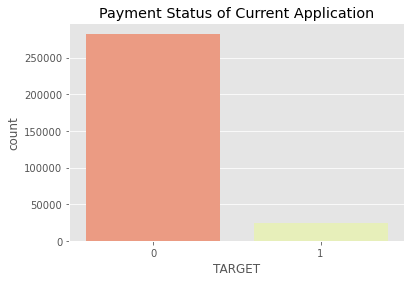

In [22]:
#Checking the imbalance
plt.title("Payment Status of Current Application")
sns.countplot(data['TARGET'], palette=["#fc9272", "#edf8b1"])
plt.show()
#non-defaulter equals to 0 , defaulters equals to 1

In [23]:
#The number of defaulters and non-defaulters in the datset
non_default  = data[data["TARGET"] == 0]
default  = data[data["TARGET"] == 1]

print("Number of defaulters: ", default.shape[0])
print("Number of non-defaulters: ", non_default.shape[0])

Number of defaulters:  24825
Number of non-defaulters:  282686


In [24]:
#Percentage of defaulters in the dataset
print("Percentage of defaulters: ", default.shape[0]*100/(default.shape[0]+non_default.shape[0]))

Percentage of defaulters:  8.072881945686495


#### Comment:
    
##### As you can see from the analysis,this dataset is highly imbalanced.
##### The Percentage of defaulters is 8
##### The Percentage of Non-defaulters is 92
##### Data Imbalance Ratio 8:92

#### Here we have divided the dataset into smaller segments and analyzed segment-wise .



 ##### Documents Submitted by Applicant

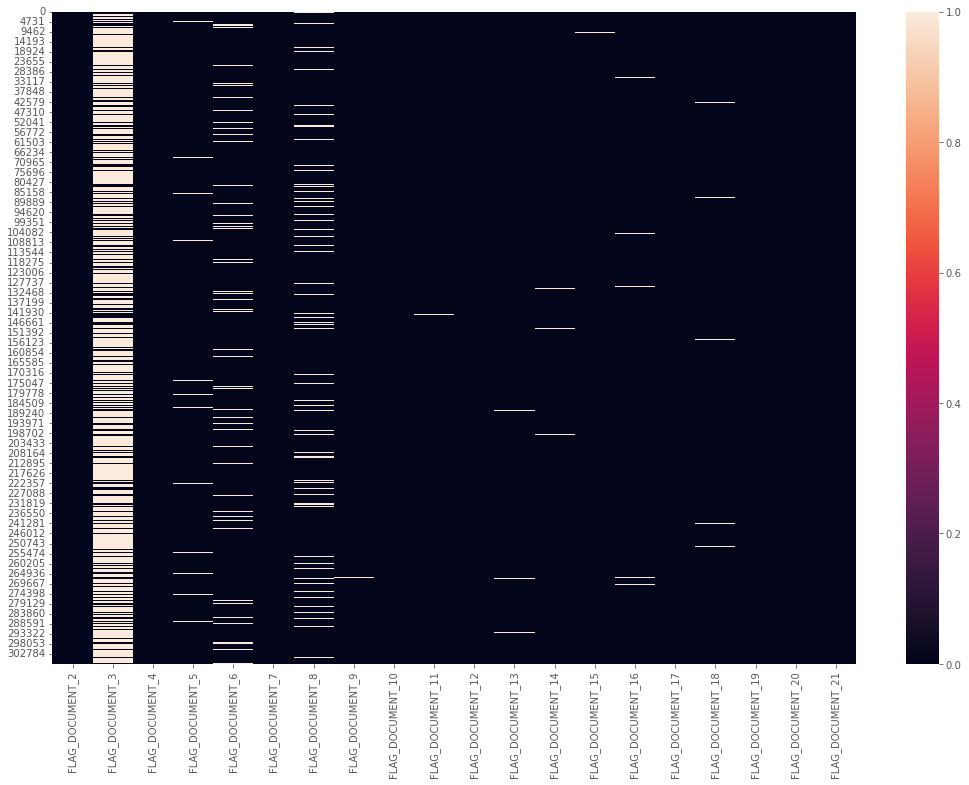

In [25]:
starting_doc = data.columns.get_loc("FLAG_DOCUMENT_2")
ending_doc = data.columns.get_loc("FLAG_DOCUMENT_21")+1

plt.figure(figsize=(18,12))
sns.heatmap(data.iloc[:,starting_doc:ending_doc])
plt.show()

#### Comment:

##### The heatmap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases.
##### Hence all the documents (except document 3) will not contribute towards analyzing the data. 
##### Hence all these columns can be dropped.


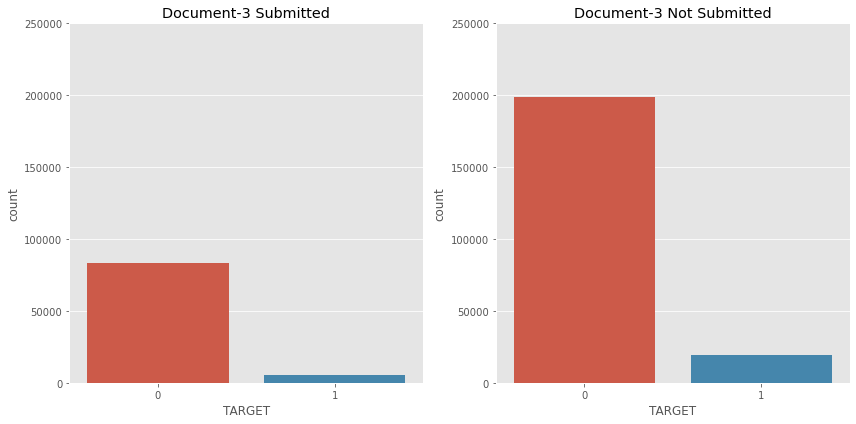

In [26]:
#better view of document 3 submitted and not submitted in the case of defaulters(1) and non-defaulters(0)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title="Document-3 Not Submitted")

sns.countplot(data[data["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(data[data["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()

plt.show()

#### Comment :
 #####   Since FLAG_DOCUMENT_3 shows similar trends for both defaulters and non-defaulters, we can drop FLAG_DOCUMENT_3 column as well.

#### Housing Type Analysis

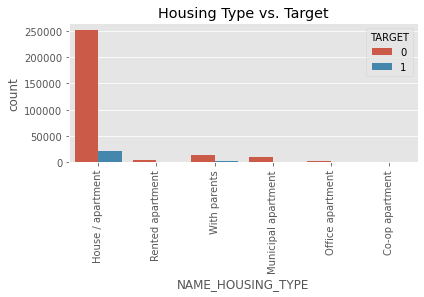

In [27]:
#countplot showing Housing type for non-defaulters (0) and defaulters (1)
plt.figure()
sns.countplot(data["NAME_HOUSING_TYPE"], hue=data["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

In [28]:
# Percentage of defaulters in Name_Housing_type 
value_wise_defaulter_percentage(data, 'NAME_HOUSING_TYPE')

,Value,Percentage of Defaulter
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795711
4,Office apartment,6.572411


#### Comment:
 #####   From the analysis, most of the loan applicants live in House/Apartment
 #####   The most defaulters live in rented apartment or live with their parents
 

#### Social Circle Analysis

In [29]:
#countplot showing Social Circle Analysis for non-defaulters (0) and defaulters (1)
start_doc = data.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_doc = data.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle_df = data.iloc[:, start_doc:end_doc+1]

In [30]:
social_circle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   OBS_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 1   DEF_30_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
 3   DEF_60_CNT_SOCIAL_CIRCLE  306490 non-null  float64
dtypes: float64(4)
memory usage: 9.4 MB


In [31]:
social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


<AxesSubplot:>

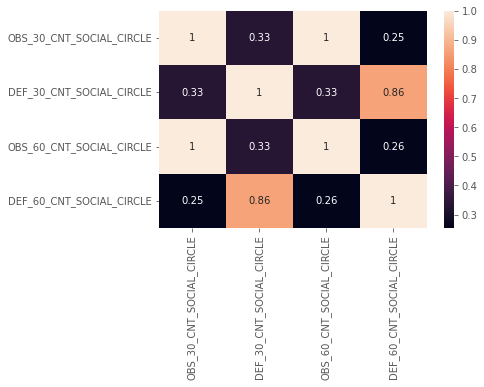

In [32]:
sns.heatmap(social_circle_df.corr(), annot=True)

#### Comment:

##### DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
##### OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

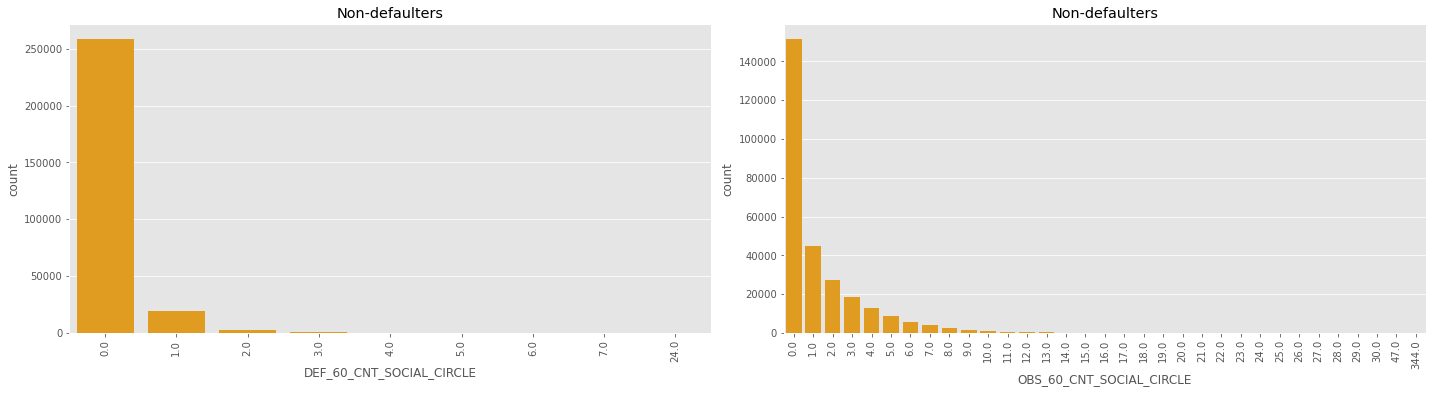

In [33]:
#countplot for non-defaulters social circle
fig=plt.subplots(figsize=(20,10))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=non_default, color = 'orange')
    plt.title("Non-defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

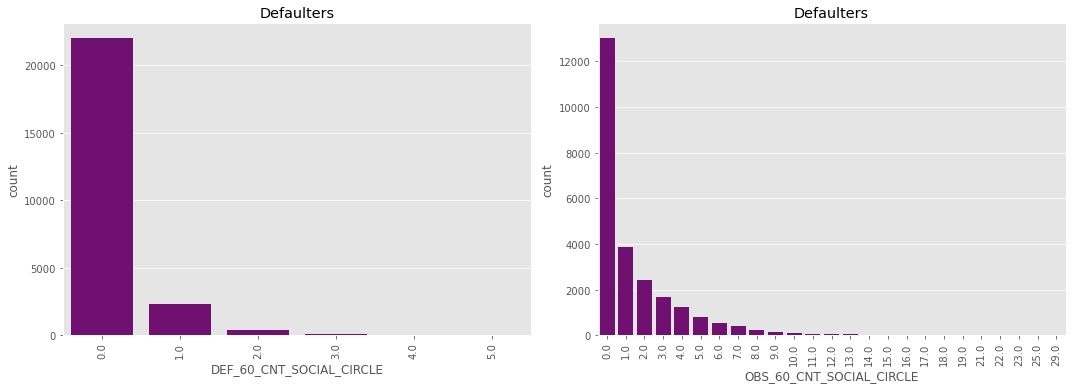

In [34]:
#countplot for defaulters social circle
fig=plt.subplots(figsize=(15,10))

for i, j in enumerate(['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(j, data=default, color = 'purple')
    plt.title("Defaulters")
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Comment:

#### For defaulters and non-defaulters 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' features show similar trend.

### Asset Details

In [35]:
data[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FLAG_OWN_CAR     307511 non-null  object
 1   FLAG_OWN_REALTY  307511 non-null  object
 2   TARGET           307511 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.0+ MB


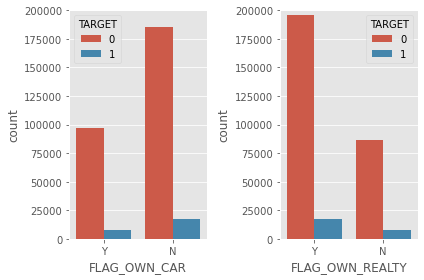

In [36]:
#countplot for non-defaulters(0) and defaulters(1) asset details
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(data['FLAG_OWN_CAR'], hue=data['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(data['FLAG_OWN_REALTY'], hue=data['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

In [37]:
#percentage of defaulters who own car
value_wise_defaulter_percentage(data, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.500227
1,Y,7.243730


In [38]:
#percentage of defaulters who own realty
value_wise_defaulter_percentage(data, 'FLAG_OWN_REALTY')

,Value,Percentage of Defaulter
1,N,8.324929
0,Y,7.961577


##### Comment:

#####  People not owning realty and car and have a slightly higher default rate than the people who own reality and car

#### Family Related Info

In [39]:
data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307511 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307511 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.0+ MB


In [40]:
# dropping the rows with null values in CNT_FAM_MEMBERS

data = data.dropna(subset=['CNT_FAM_MEMBERS']) 
data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CNT_CHILDREN        307509 non-null  int64  
 1   CNT_FAM_MEMBERS     307509 non-null  float64
 2   NAME_FAMILY_STATUS  307509 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 9.4+ MB


In [41]:
# Since number of family members cannot have fraction, we are converting to Integer

data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].astype(int)
data[['CNT_FAM_MEMBERS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   CNT_FAM_MEMBERS  307509 non-null  int32
dtypes: int32(1)
memory usage: 3.5 MB


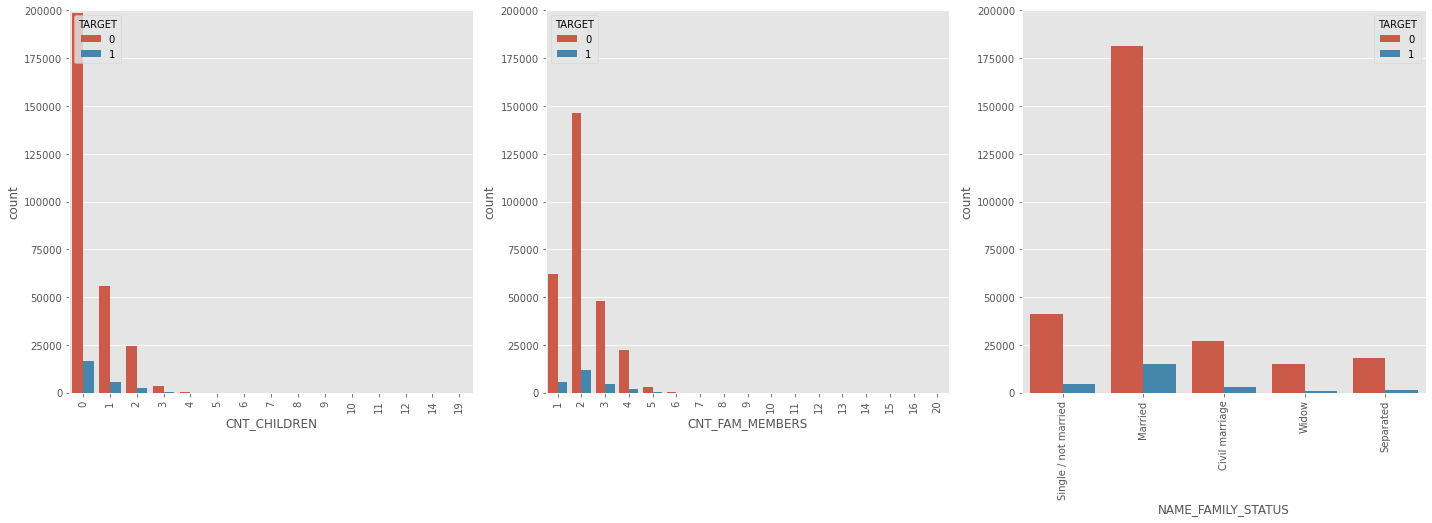

In [42]:
#countplot for children , family members and marital status for defaulters (1) and non-defaulters (0)
fig=plt.subplots(figsize=(20, 20))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1,xlim = (0,20), ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data[j], hue=data["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [43]:
#Percentage of marital Status in defaulters 
value_wise_defaulter_percentage(data, 'NAME_FAMILY_STATUS')

,Value,Percentage of Defaulter
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559868
3,Widow,5.824217


In [44]:
#Percentage of children in defaulters 
value_wise_defaulter_percentage(data, 'CNT_CHILDREN')

,Value,Percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711881
5,7.0,0.000000


In [45]:
data.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [46]:
#Percentage of family members in defaulters 
value_wise_defaulter_percentage(data, 'CNT_FAM_MEMBERS')

,Value,Percentage of Defaulter
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583498


In [47]:

data.CNT_FAM_MEMBERS.value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
14         2
12         2
20         2
16         2
13         1
15         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

#### Comment:

#### Default rate is highest for Civil Marriage and Single applicants
#### Most of the applicants are married (and/or) no children (and/or) 2 family members.
#### Applicants with relatively more number of children (and/or) family members have higher default percentage.

#### For some of the cases where count children/family members is high, and the default rate is very high or very low. These cases cannot be taken as a conclusion as number of applicants having a large family is very low.

#### Education and Occupation Info and Income Type Info


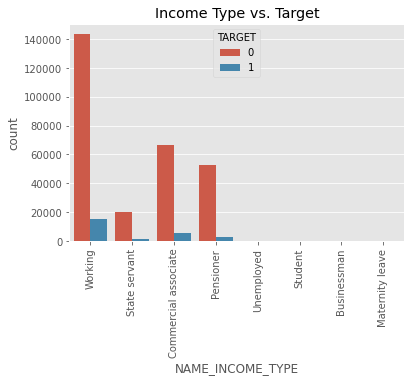

In [48]:
#countplot for income type for defaulters (1) and non-defaulters(0)
plt.figure()
sns.countplot(data['NAME_INCOME_TYPE'], hue=data["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [49]:
#Percentage of defaulters in Income_Type
value_wise_defaulter_percentage(data,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588472
2,Commercial associate,7.484466
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


In [50]:
#count of defaulters in Income_Type
data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

#### Comment:

#### Most of the applicants are working.
#### Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
#### Businessman have lowest (0) percentage of Defaulter However, if we see the count, the applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

In [51]:
#Percentage of defaulters in Education Type
value_wise_defaulter_percentage(data,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,10.930537
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.484966
1,Higher education,5.355187
4,Academic degree,1.829268


#### Comment:

#### Applicants having "Lower secondary" education have highest percentage of Defaulter. Applicants having 'Higher education' and ' academic degree' have lowest percentage of defaulters

In [52]:
data['OCCUPATION_TYPE'].isnull().value_counts()

False    211118
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [53]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [54]:
#Imputing missing value for OCCUPATION TYPE as "Unknown"

data['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

In [55]:
value_wise_defaulter_percentage(data, 'OCCUPATION_TYPE')

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


#### Comment:

#### Low skilled labourers have very high rate of defaulters in comparison to other occupations

#### Gender Analysis

In [56]:
#null values of gender column
data['CODE_GENDER'].isnull().sum()

0

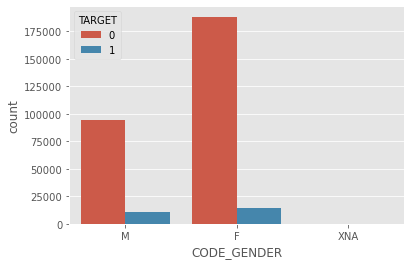

In [57]:
#countplot for gender for defaulters (1) and non-defaulters(0)
sns.countplot(data['CODE_GENDER'], hue=data["TARGET"])
plt.show()

#### Comment:

#### Female applicants are more than male applicants
#### Defaulter percentage is higher for male applicants

#### Name_Type_Suite, Name_Contract_Type and Weekday_appr_process_start Analysis

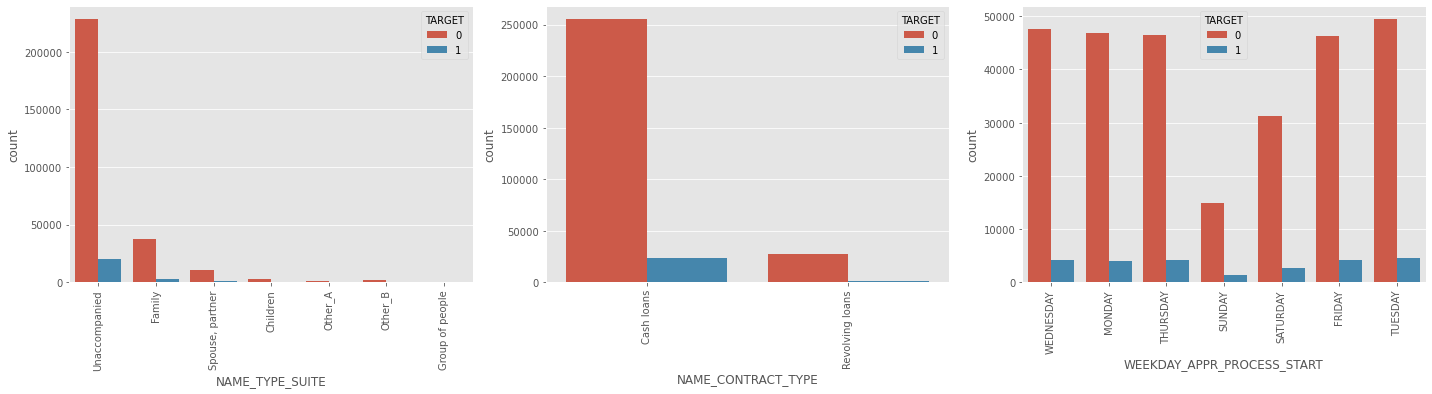

In [58]:
#countplot for Name_type_suite, Name_contract_type and weekday_appr_process_start for non-defaulters (0) and defaulters (1)
fig=plt.subplots(figsize=(20, 15))

for i, j in enumerate(['NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(data[j], hue=data["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Comment:

#### Most of the applicants are unaccompanied while applying for loan
#### Number Cash loans is quite higher than Revolving Loans
#### All weekdays have similar number of applicants than weekend(Saturday and Sunday)

#### for AMT_ANNUITY column

In [59]:
data.AMT_ANNUITY.isnull().sum()

12

In [60]:
data['AMT_ANNUITY'].describe()

count    307497.000000
mean      27108.545347
std       14493.778987
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

#### for AMT_GOODS_PRICE column

In [61]:
data.AMT_GOODS_PRICE.isnull().sum()

276

In [62]:
float(100*(278/307511))

0.09040327012692229

In [63]:
data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

#### for EXT_SOURCE_2

In [64]:
data.EXT_SOURCE_2.isnull().sum()

660

In [65]:
float(100*(660/307511))

0.21462646864665005

#### Checking and validating Datatypes

In [66]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
data.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN


We will now modify the datatypes of certain categorical variables and continuous variables.

#### DAYS_BIRTH variable

In [68]:
data['DAYS_BIRTH'].describe()

count    307509.000000
mean     -16037.017291
std        4363.994085
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [69]:
data['DAYS_BIRTH']=abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'].describe()

count    307509.000000
mean      16037.017291
std        4363.994085
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

#### DAYS_EMPLOYED variable

In [70]:
data['DAYS_EMPLOYED']=abs(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED'].describe()

count    307509.000000
mean      67725.178092
std      139444.100488
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

#### DAYS_REGISTRATION variable

In [71]:
data['DAYS_REGISTRATION']=abs(data['DAYS_REGISTRATION'])
data['DAYS_REGISTRATION'].describe()

count    307509.000000
mean       4986.136946
std        3522.891109
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7480.000000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

#### DAYS_ID_PUBLISH variable

In [72]:
data['DAYS_ID_PUBLISH']=abs(data['DAYS_ID_PUBLISH'])
data['DAYS_ID_PUBLISH'].describe()

count    307509.000000
mean       2994.202140
std        1509.450739
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

#### Modifying datatypes of other categorical variables

In [73]:
data['REG_REGION_NOT_LIVE_REGION'] = data['REG_REGION_NOT_LIVE_REGION'].astype(object)
data['REG_REGION_NOT_WORK_REGION'] = data['REG_REGION_NOT_WORK_REGION'].astype(object)
data['LIVE_REGION_NOT_WORK_REGION'] = data['LIVE_REGION_NOT_WORK_REGION'].astype(object)
data['REG_CITY_NOT_LIVE_CITY'] = data['REG_CITY_NOT_LIVE_CITY'].astype(object)
data['REG_CITY_NOT_WORK_CITY'] = data['REG_CITY_NOT_WORK_CITY'].astype(object)
data['LIVE_CITY_NOT_WORK_CITY']= data['LIVE_CITY_NOT_WORK_CITY'].astype(object)


In [74]:
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [75]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


###  Outliers Handling

####  AMT_ANNUITY variable

In [76]:
data.AMT_ANNUITY.describe()

count    307497.000000
mean      27108.545347
std       14493.778987
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

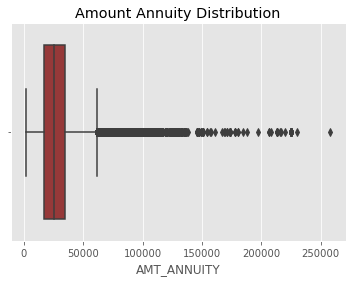

In [77]:
#boxplot for Amount Annuity Distribution
sns.boxplot(data.AMT_ANNUITY, color = 'brown')
plt.title('Amount Annuity Distribution')
plt.show()

As seen here, outlier is present at 258025. Hence to impute the outlier values, we can use median here.

#### AMT_INCOME

In [78]:
data.AMT_INCOME_TOTAL.describe()

count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

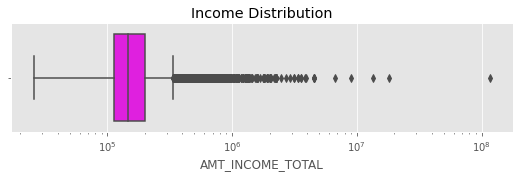

In [79]:
#boxplot for Income Distribution
plt.figure(figsize=(9,2))
sns.boxplot(data.AMT_INCOME_TOTAL, color = 'magenta')
plt.xscale('log')
plt.title('Income Distribution')
plt.show()

In [80]:
data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

Here in 'AMT_INCOME_TOTAL' variable outlier values stands at 1.17x10^8. As the 95th and 99th quantile values differ largely, we can conclude the presence of outliers in the data set.

#### AMT_CREDIT

In [81]:
data.AMT_CREDIT.describe()

count    3.075090e+05
mean     5.990258e+05
std      4.024921e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

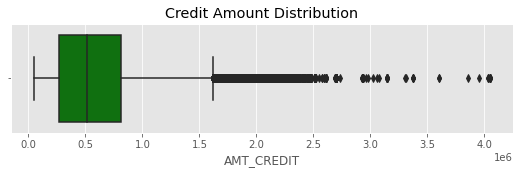

In [82]:
#boxplot for Credit Amount Distribution
plt.figure(figsize=(9,2))
sns.boxplot(data.AMT_CREDIT, color = 'green')
plt.title('Credit Amount Distribution')
plt.show()

In [83]:
data.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

The outliers here are present after the 99th quantile.

#### DAYS_BIRTH

In [84]:
data.DAYS_BIRTH.describe()

count    307509.000000
mean      16037.017291
std        4363.994085
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

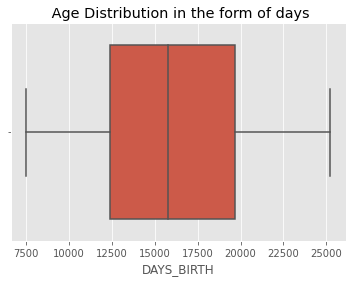

In [85]:
sns.boxplot(data.DAYS_BIRTH)
plt.title(' Age Distribution in the form of days')
plt.show()

#### DAYS_EMPLOYED

In [86]:
DAYS_EMPLOYED = data.DAYS_EMPLOYED.describe()

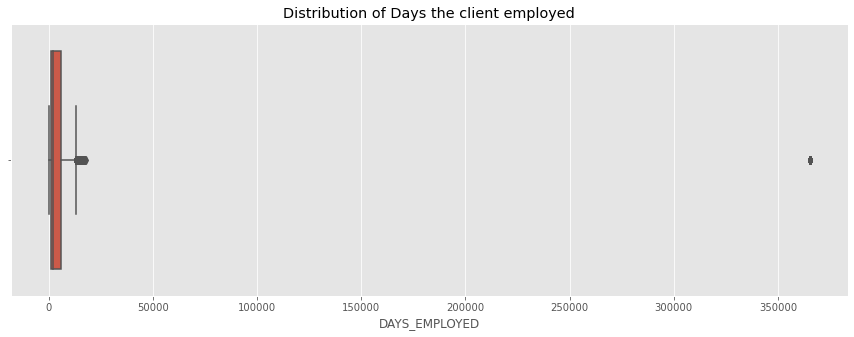

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(data.DAYS_EMPLOYED)
#plt.yscale('log')
plt.title('Distribution of Days the client employed')

plt.show()

As seen above, we have an outlier at 365243

### Binning Variables

#### Credit amount

In [88]:
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

#### Income amount

In [89]:
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']
data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [90]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low


### Univariate Analysis - Numeric variables

#### Credit Amount Analysis

In [91]:
100*(data.TARGET.value_counts())/ (len(data))

0    91.927066
1     8.072934
Name: TARGET, dtype: float64

In [92]:
target1 = data[data['TARGET']==1]
target0 = data[data['TARGET']==0]

In [93]:
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low


In [94]:
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,High,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,High,Medium
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


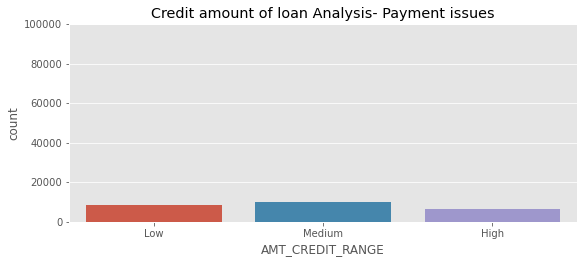

In [95]:
#for payment difficulties
#countplot for Credit Amount Analysis for Payment Issues
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan Analysis- Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_CREDIT_RANGE'])
plt.show()

<AxesSubplot:title={'center':'Credit amount of loan Analysis - No payment issues'}, xlabel='AMT_CREDIT_RANGE', ylabel='count'>

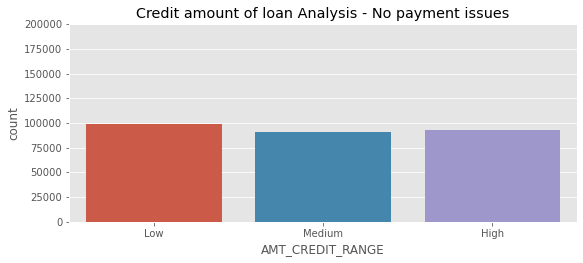

In [96]:
# For non-payment difficulties
# countplot for Credit Amount Analysis for Payment Issues
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Credit amount of loan Analysis - No payment issues')
sns.countplot(target0['AMT_CREDIT_RANGE'])

### Conclusion - Customers who have low credit amount are more likely to pay back the loan

#### Income Analysis

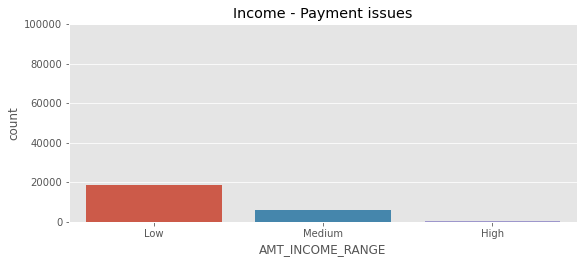

In [97]:
# For payment issues
#countplot for Income Payment issues 
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 2)
plt.title('Income - Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_INCOME_RANGE'])
plt.show()

<AxesSubplot:title={'center':'Income - No payment issue'}, xlabel='AMT_INCOME_RANGE', ylabel='count'>

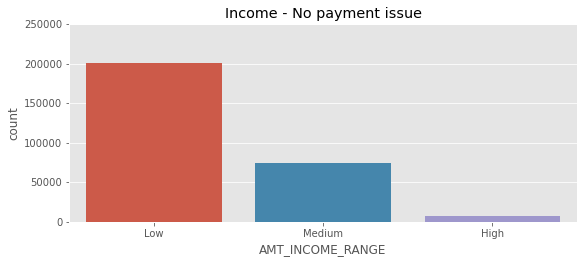

In [98]:
# For non-payment issues
#countplot for Income Payment issues 
plt.figure(figsize = (20, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,250000)
plt.title('Income - No payment issue')
sns.countplot(target0['AMT_INCOME_RANGE'])

#### Conclusion - As compared to the other categories, clients having low income are more likely to repay the loan.


### Univariate analysis - Categorical variables

#### Family Status

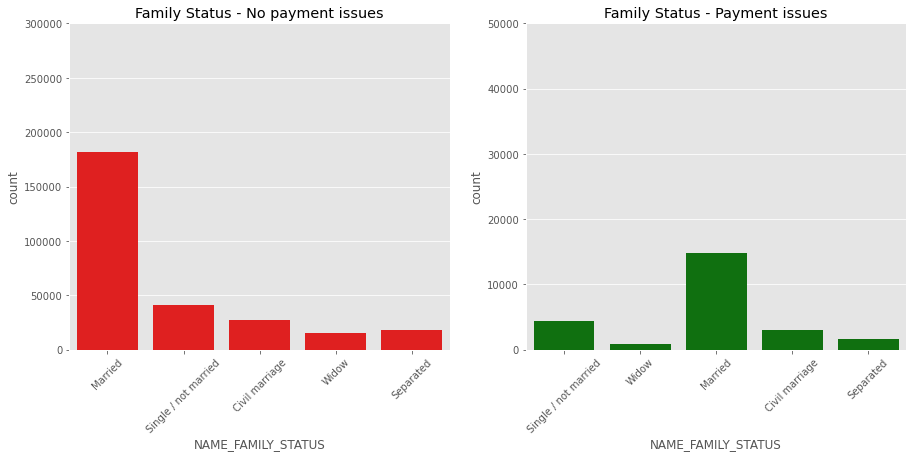

In [99]:
# For no payment issues
#countplot for Family Status
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)


sns.countplot(target0['NAME_FAMILY_STATUS'],color="red")
plt.title('Family Status - No payment issues')
plt.ylim(0,300000)
plt.xticks(rotation = 45)

# For payment issues
#countplot for Family Status
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_FAMILY_STATUS'],color="green")
plt.title('Family Status - Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

#### Conclusion - Widows are the least likely category to repay whereas as seen here, Married category is most likely to repay the loan amount.

 #### Education type analysis

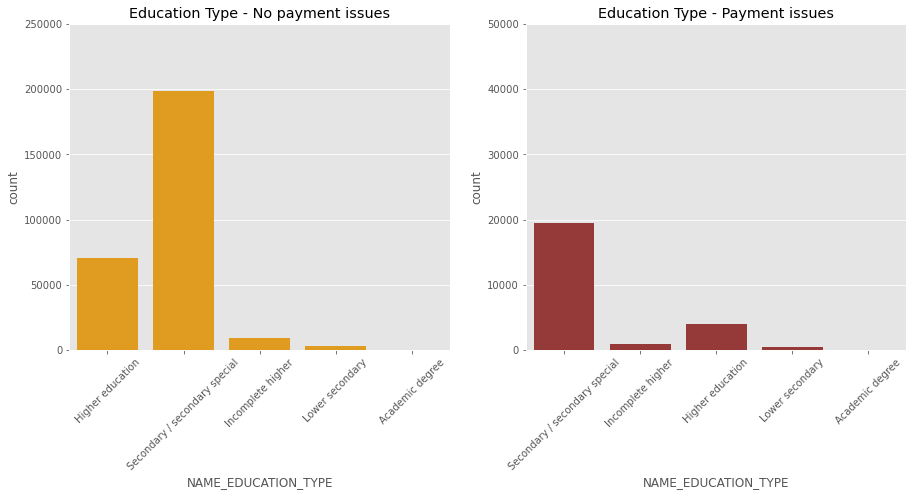

In [100]:
# For no payment issues
#countplot for Education Type
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)


sns.countplot(target0['NAME_EDUCATION_TYPE'],color="orange")
plt.title('Education Type - No payment issues')
plt.ylim(0,250000)
plt.xticks(rotation = 45)

# For payment issues
#countplot for Education Type
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_EDUCATION_TYPE'],color="brown")
plt.title('Education Type - Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

#### Conclusion - People most likely to repay te loan have secondary/Secondary special education status whereas clients having an academic degree are the most defaulters.

###  Univariate Analysis - Continuous variables

#####  Annuity Amount

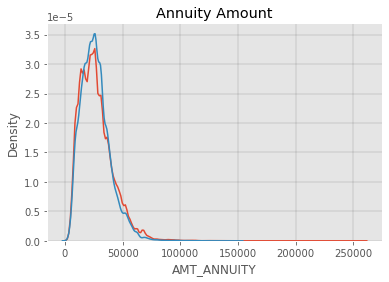

In [101]:
#distribution plot for Annuity Amount
sns.distplot(target0['AMT_ANNUITY'], hist = False, label="Success")
sns.distplot(target1['AMT_ANNUITY'], hist = False, label="Fail")
plt.title('Annuity Amount')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Credit Amount

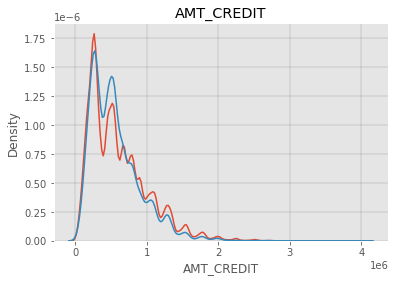

In [102]:
#distribution plot for Credit Amount
sns.distplot(target0['AMT_CREDIT'], hist = False, label="Success")
sns.distplot(target1['AMT_CREDIT'], hist = False, label="Fail")
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

In [103]:
data[['EXT_SOURCE_2','EXT_SOURCE_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EXT_SOURCE_2  306849 non-null  float64
 1   EXT_SOURCE_3  246545 non-null  float64
dtypes: float64(2)
memory usage: 15.1 MB


In [104]:
data[['EXT_SOURCE_3','EXT_SOURCE_3']].describe()

,EXT_SOURCE_3,EXT_SOURCE_3
count,246545.000000,246545.000000
mean,0.510852,0.510852
std,0.194844,0.194844
min,0.000527,0.000527
25%,0.370650,0.370650
50%,0.535276,0.535276
75%,0.669057,0.669057
max,0.896010,0.896010


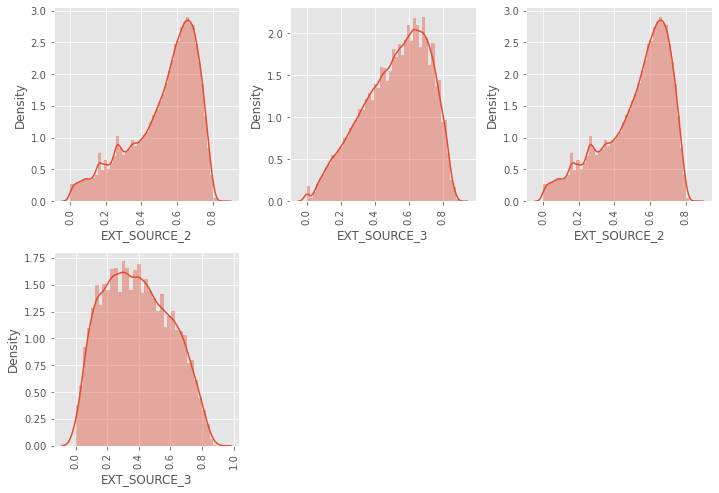

In [105]:
#distribution plot for ext_source_2 and ext_source_3
fig=plt.subplots(figsize=(10, 20))

for i, j in enumerate(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 3:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(data[data["TARGET"] == target][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

#### Comment:

#### 'EXT_SOURCE_2' and 'EXT_SOURCE_3' have very different distribution for defaulters and non-defaulters.

### Top 10 correlation for Defaulters

In [106]:
#for all numerical columns
cor=target0.corr()
cor

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000718,0.001750,-0.000341,0.000070,-0.000205,0.000357,0.001343,0.001742,...,0.001194,0.000676,0.000832,-0.000486,-0.001879,-0.001725,0.002524,0.000055,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000718,NaN,1.000000,0.027403,0.003082,0.020907,-0.000525,-0.024362,-0.336971,-0.245177,...,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007088,-0.042548
AMT_INCOME_TOTAL,0.001750,NaN,0.027403,1.000000,0.342802,0.418954,0.349462,0.167856,-0.062602,-0.140389,...,0.008215,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013129,0.029536
AMT_CREDIT,-0.000341,NaN,0.003082,0.342802,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,...,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000070,NaN,0.020907,0.418954,0.771309,1.000000,0.776686,0.120989,-0.012261,-0.104978,...,-0.008343,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,...,0.034093,0.020772,0.032866,-0.013962,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.000357,NaN,-0.024362,0.167856,0.100604,0.120989,0.103827,1.000000,0.025245,-0.007197,...,0.013496,0.002656,-0.000112,0.003276,-0.002265,0.001970,-0.002479,0.078630,-0.001012,0.001776
DAYS_BIRTH,0.001343,NaN,-0.336971,-0.062602,0.047378,-0.012261,0.044565,0.025245,1.000000,0.626113,...,-0.046492,-0.003977,-0.009797,-0.026467,-0.004462,-0.002772,0.001068,-0.002856,0.011334,0.072885
DAYS_EMPLOYED,0.001742,NaN,-0.245177,-0.140389,-0.070104,-0.104978,-0.068609,-0.007197,0.626113,1.000000,...,-0.041894,-0.010253,-0.010381,-0.008643,-0.004460,-0.000874,0.002223,-0.034890,0.015115,0.052168


In [107]:
cordf = cor.unstack().reset_index()
cordf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,-0.000718
3,SK_ID_CURR,AMT_INCOME_TOTAL,0.001750
4,SK_ID_CURR,AMT_CREDIT,-0.000341


In [108]:
cordf.columns=['VAR1','VAR2','Correlation']
cordf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,-0.000718
3,SK_ID_CURR,AMT_INCOME_TOTAL,0.001750
4,SK_ID_CURR,AMT_CREDIT,-0.000341


In [109]:
cordf.dropna(subset = ['Correlation'], inplace = True)
cordf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.000000
2,SK_ID_CURR,CNT_CHILDREN,-0.000718
3,SK_ID_CURR,AMT_INCOME_TOTAL,0.001750
4,SK_ID_CURR,AMT_CREDIT,-0.000341
5,SK_ID_CURR,AMT_ANNUITY,0.000070


In [110]:
cordf['Correlation'] = round(cordf['Correlation'], 2)
cordf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.0
2,SK_ID_CURR,CNT_CHILDREN,-0.0
3,SK_ID_CURR,AMT_INCOME_TOTAL,0.0
4,SK_ID_CURR,AMT_CREDIT,-0.0
5,SK_ID_CURR,AMT_ANNUITY,0.0


In [111]:
cordf['Correlation'] = cordf['Correlation'].abs()
cordf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.0
2,SK_ID_CURR,CNT_CHILDREN,0.0
3,SK_ID_CURR,AMT_INCOME_TOTAL,0.0
4,SK_ID_CURR,AMT_CREDIT,0.0
5,SK_ID_CURR,AMT_ANNUITY,0.0


In [112]:
cordf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.0
168,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,1.0
1454,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0
1400,DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,1.0
1346,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.0
1344,OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0
1288,EXT_SOURCE_3,EXT_SOURCE_3,1.0
1232,EXT_SOURCE_2,EXT_SOURCE_2,1.0
1176,HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,1.0
1120,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,1.0


In [113]:
cor = target1.corr()

cor = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
cordf = cor.unstack().reset_index()
cordf.columns = ['VAR1', 'VAR2', 'Correlation']
cordf.dropna(subset = ['Correlation'], inplace = True)
cordf['Correlation'] = round(cordf['Correlation'], 2)
cordf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
1454,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
334,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1119,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
992,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
1510,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
335,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
279,AMT_ANNUITY,AMT_CREDIT,0.75
1824,FLAG_DOCUMENT_6,DAYS_EMPLOYED,0.62
503,DAYS_EMPLOYED,DAYS_BIRTH,0.58
1823,FLAG_DOCUMENT_6,DAYS_BIRTH,0.39


In [114]:
defaulter_cor = default.corr()
round(defaulter_cor, 2)

cor_list = defaulter_cor.unstack(level=0)

In [115]:
# Listing the correlations in pair sorted in descending order
cor_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                     1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752699
AMT_CREDIT                   AMT_ANNUITY                    0.752195
DAYS_EMPLOYED                FLAG_DOCUMENT_6                0.617307
dtype: float64

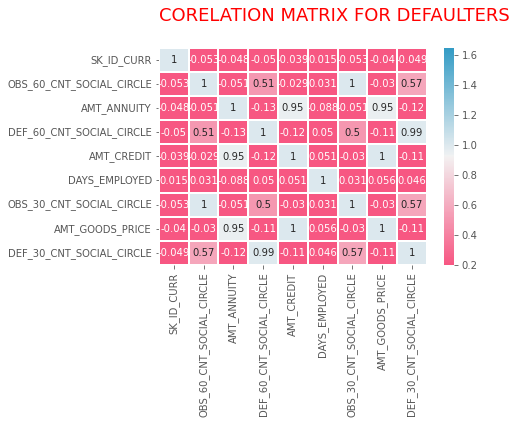

In [116]:
defaulter_cor = pd.DataFrame(defaulter_cor, columns =['SK_ID_CURR','OBS_60_CNT_SOCIAL_CIRCLE','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','DAYS_EMPLOYED','OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE','DEF_30_CNT_SOCIAL_CIRCLE'])
mask = np.triu(np.ones_like(defaulter_cor, dtype=np.bool))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(defaulter_cor.corr(),linewidths = 0.30, cmap=cmap, vmin= 0.2, vmax=1.65,annot = True)

# adjust mask and df
mask = mask[1:, :-1]
corr = defaulter_cor.iloc[1:,:-1].copy()

# title
title = 'Corelation Matrix for Defaulters\n'.upper()
plt.title(title, loc='left', fontsize=18, color = 'red')
plt.show()


#### The highest corelation for defaulters is between:
        Amt_credit and Amt_annuity
        Amt_goods_price and Amt_annuity
        Def_60_cnt_social_circle and Def_30_cnt_social_circle
        OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE

#### Top 10 Correlation for Non-defaulters

In [117]:
nondefaulter_corr = non_default.corr()
round(nondefaulter_corr, 2)

nondf_corr_list = nondefaulter_corr.unstack(level = 0)

In [118]:
# Listing the correlations in pair sorted in descending order
nondf_corr_list.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      0.998508
AMT_GOODS_PRICE              AMT_CREDIT                    0.987250
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.859332
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.830381
AMT_ANNUITY                  AMT_GOODS_PRICE               0.776686
                             AMT_CREDIT                    0.771309
FLAG_EMP_PHONE               DAYS_BIRTH                    0.622073
dtype: float64

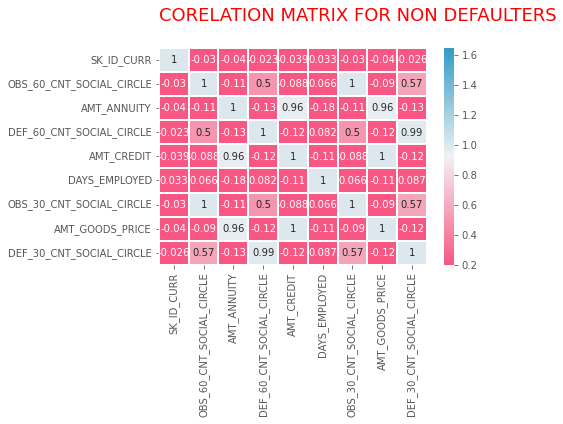

In [119]:
nondefaulter_corr = pd.DataFrame(nondefaulter_corr, columns =['SK_ID_CURR','OBS_60_CNT_SOCIAL_CIRCLE','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','DAYS_EMPLOYED','OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE','DEF_30_CNT_SOCIAL_CIRCLE'])
mask = np.triu(np.ones_like(nondefaulter_corr, dtype=np.bool))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(nondefaulter_corr.corr(),linewidths = 0.30, cmap=cmap, vmin= 0.2, vmax=1.65,annot = True)

# adjust mask and df
mask = mask[1:, :-1]
corr = nondefaulter_corr.iloc[1:,:-1].copy()

# title
title = 'Corelation Matrix for Non Defaulters\n'.upper()
plt.title(title, loc='left', fontsize=18, color = 'red')
plt.show()

#### The highest corelation for non-defaulters is between:
    Amt_credit and Amt_annuity
    Amt_goods_price and Amt_annuity
    Def_60_cnt_social_circle and Def_30_cnt_social_circle
    OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE
    

###  Bivariate Analysis

####  Numeric - Numeric

#### Income v/s Good Price

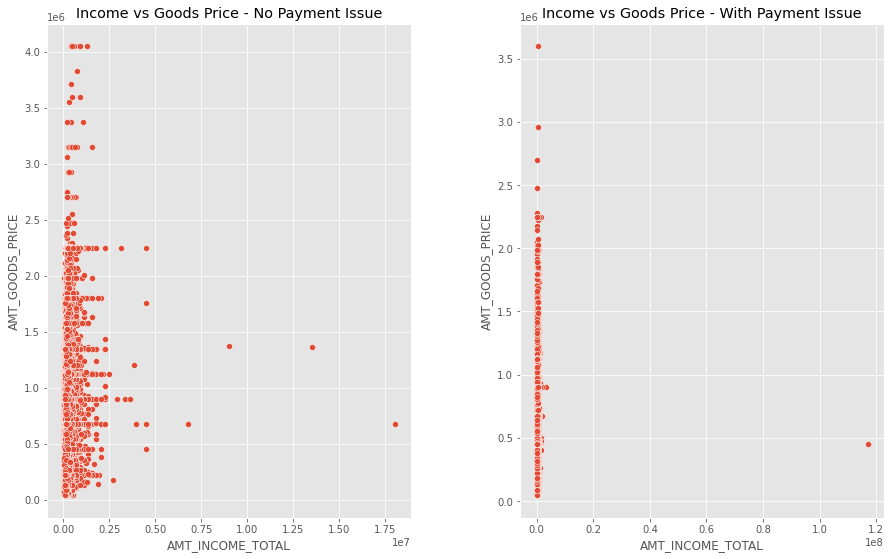

In [120]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target0.AMT_INCOME_TOTAL,target0.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Goods Price - No Payment Issue')

plt.subplot(2,2,2)
sns.scatterplot(target1.AMT_INCOME_TOTAL,target1.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Goods Price - With Payment Issue')
plt.show()

#### Goods Prive v/s Credit

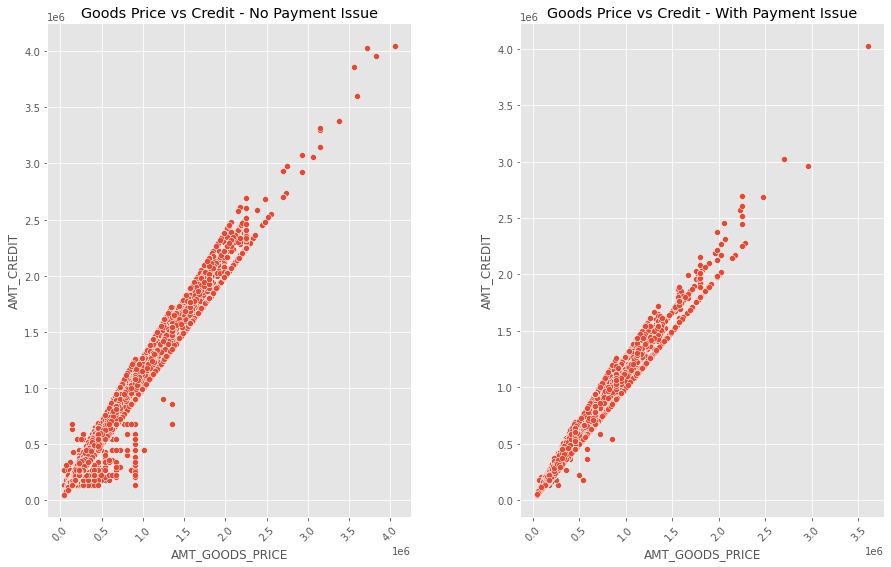

In [121]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,3)
sns.scatterplot(target0.AMT_GOODS_PRICE,target0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Goods Price vs Credit - No Payment Issue')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target1.AMT_GOODS_PRICE,target1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Goods Price vs Credit - With Payment Issue')
plt.xticks(rotation = 45)
plt.show()

##### Conclusion - Clients who have repayed the loan on time have a higher chance of getting the loan again for more expensive goods and also have a high probable opportunity to get credit for particular goods value.

####  Numeric - Categorical 

#### Income range : Education status

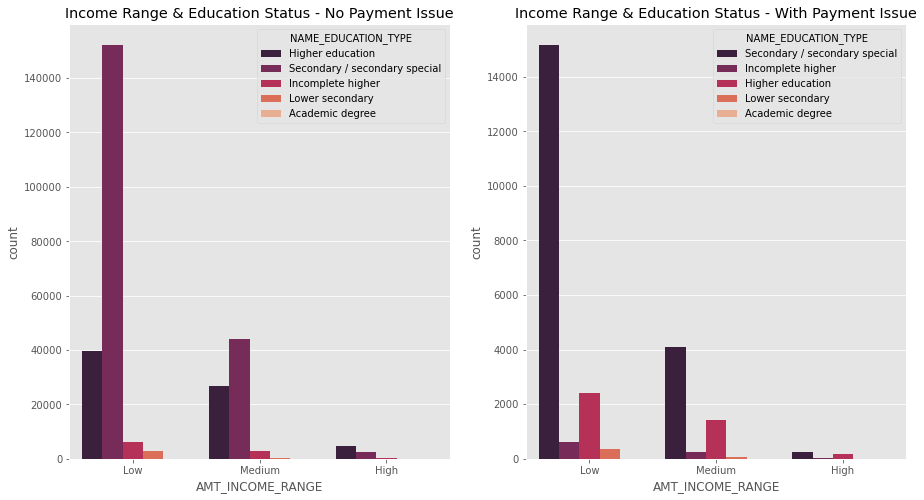

In [122]:
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.title('Income Range & Education Status - No Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=target0, palette='rocket')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Income Range & Education Status - With Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=target1,palette='rocket')
plt.show()

##### Conclusion - People most likely to repay the loan have secondary/Secondary special education status and a lower income range

#### Credit amount - Marital status

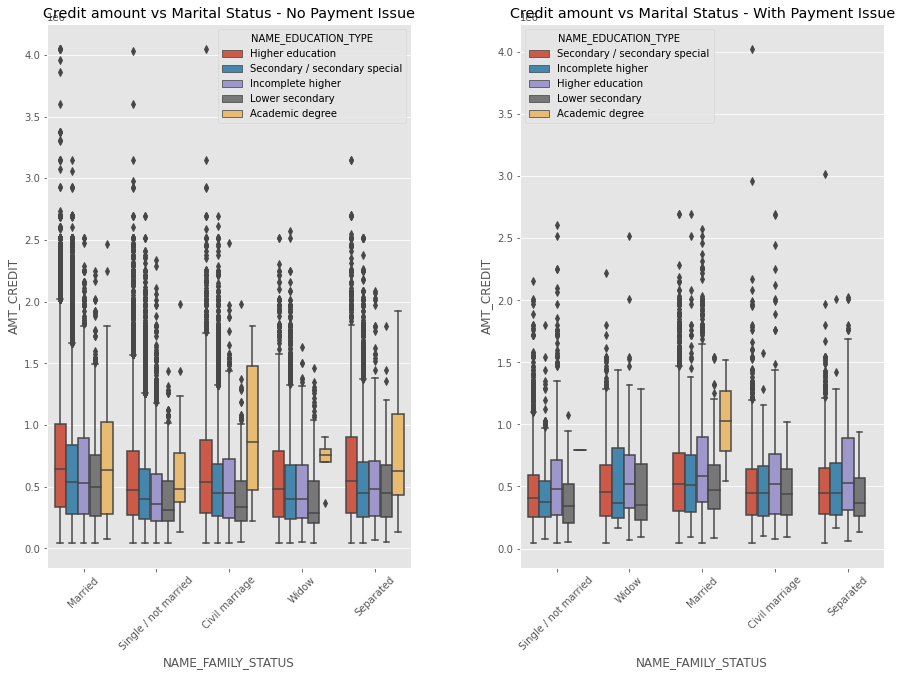

In [123]:
# Box plotting for Credit amount


plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - No Payment Issue')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - With Payment Issue')
plt.xticks(rotation=45)
plt.show()

### Conclusion - Married people with higher education get higher credit as compared to widows with low educations status

### Analysing Previous applications and Merged Data

In [124]:
#drop XNA and XAP
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [125]:
#Merge the previous application & application data file
merged_data= pd.merge(data, prev_data, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#modification of columns names after merging

new_data = merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#eliminating Unwanted columns

new_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
new_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,...,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


####  Univariate analysis

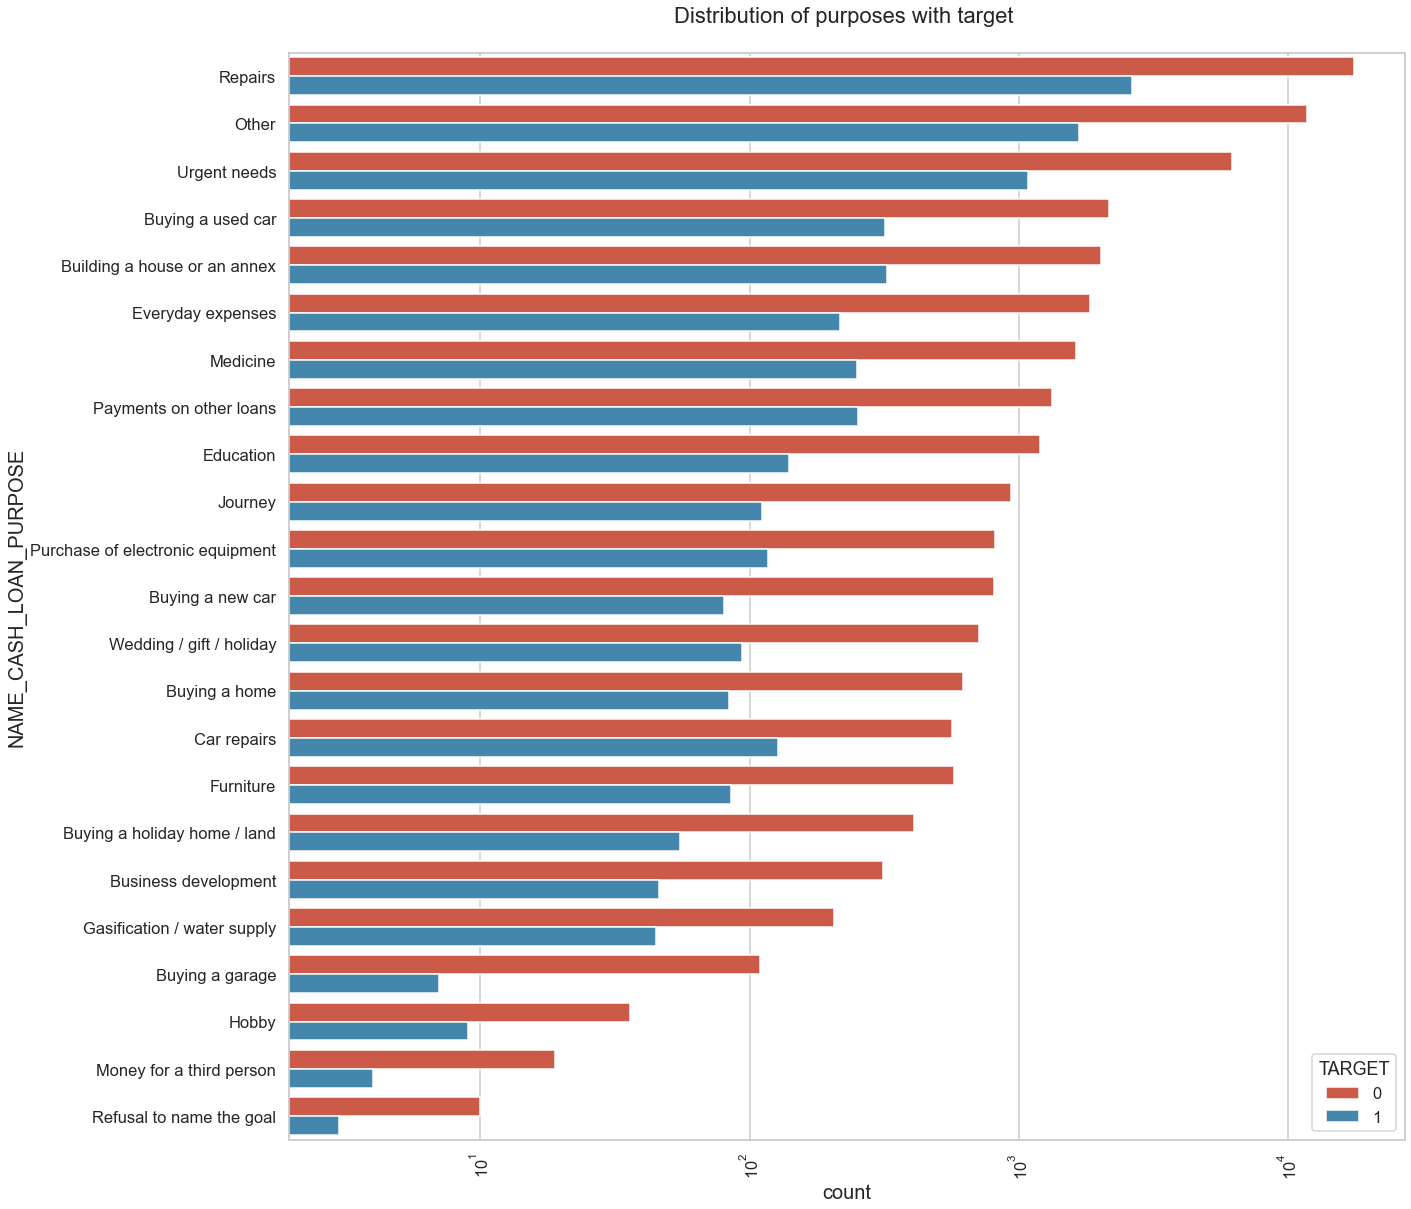

In [128]:
# countplot for distribution of purposes with target
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_data, y= 'NAME_CASH_LOAN_PURPOSE', order=new_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

#### Conclusion - Categories like 'Buying a garage', 'Money for a third person', etc are the categories who have a high chance of successful loan repayment and should be prioritized. 

####  Bivariate Analysis

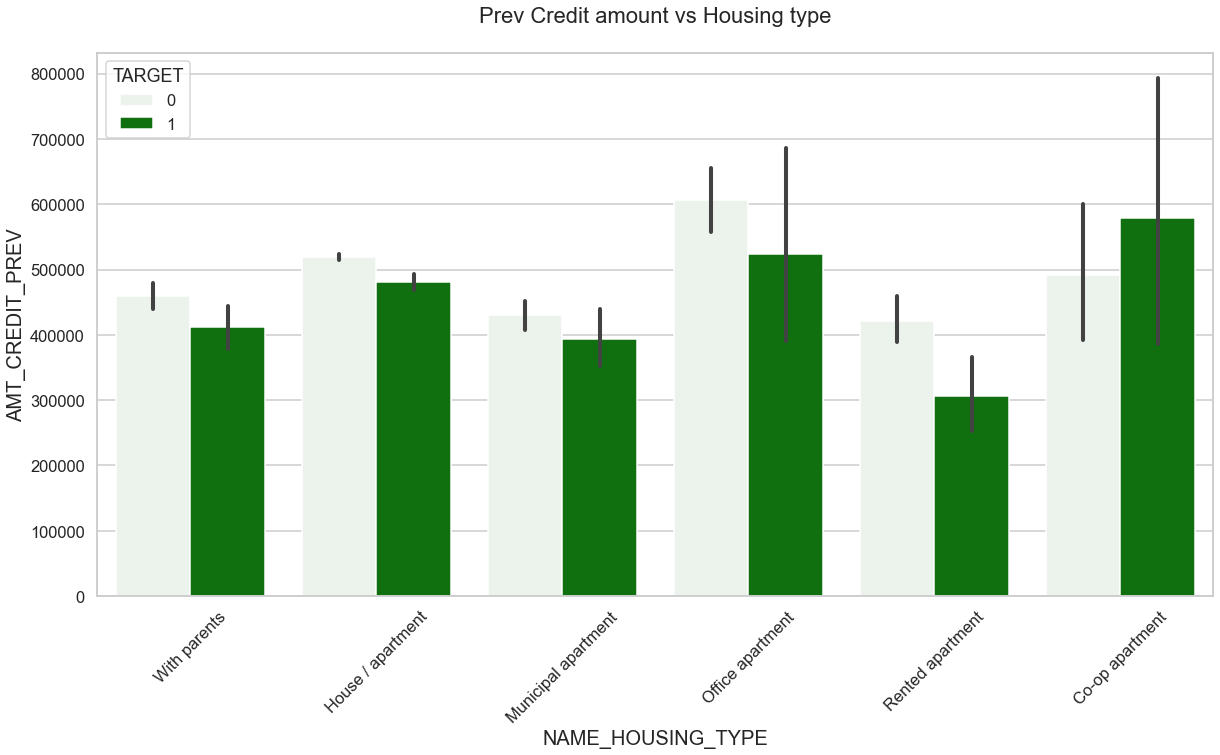

In [129]:
#Box plot for Credit amount prev v/s Housing type

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.barplot(data =new_data, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',color = 'green')
plt.title('Prev Credit amount vs Housing type')
plt.show()

##### Driving factors :
CNT_FAM_MEMBERS
CNT_CHILDREN
NAME_INCOME_TYPE
OCCUPATION_TYPE
CODE_GENDER 
AMT_ANNUITY
AMT_CREDIT

### Summary :

The data is highly imbalanced as number of defaulters is very less compared to the non-defaulters.
The percentage of non-defaulters is 8 and that of defaulters is 92%.
Number of defaulters:  24825
Number of non-defaulters:  282686

##### Current Application Data Analysis :
The heatmap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases. The Document 3 has similar trends for both non-defaulters and defaulters. Hence all the document columns can be dropped.

The most defaulters live in rented apartment or live with their parents.

For defaulters and non-defaulters 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' features show similar trend.Hence that need not be considered for analysis.

People not owning realty and car and have a slightly higher default rate than the people who own reality and car

Defaulter rate is highest for Civil Marriage and Single applicants and lowest in widows. Family and having children cases cannot be taken as a conclusion or a factor for defaulters as number of applicants having a large family is very low.

Most of the applicants are working. Hence it is advisable to approve loans for working applicants.

Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter. Businessman have lowest (0) percentage of Defaulter. However, if we see the count, the applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis. 

According to occupation type, Low skilled labourers have very high rate of defaulters in comparison to other occupations.

People most likely to repay te loan have secondary/Secondary special education status whereas clients having an academic degree are the most defaulters.

Married people with higher education get higher credit 

##### Merged Data along with Previous application data :
Clients who have repayed the loan on time have a higher chance of getting the loan again for more expensive goods and also have a high probable opportunity to get credit for particular goods value.

People most likely to repay the loan have secondary/Secondary special education status and a lower income range

Categories like 'Buying a garage', 'Money for a third person', etc are the categories who have a high chance of successful loan repayment and should be prioritized. 

Bank should be careful while approving loans for 'co-op apartment' categories.